## TinySOL instrument classification task using Essentia Music Extractor.

Given the feature selection metrics produced in Sound_classification.ipynb, I try to create a new model with (many) fewer features

In [1]:
#If not installed, install Essentia. 
# This cell is for running the notebook in Colab
import importlib.util
if importlib.util.find_spec('essentia') is None:
    !pip install essentia

!pip install mirdata
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 51.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=59be1ce05c1a5dfe49caa4954f4ea5a3c1966905b8b4270fca842aa719509b0c
  Stored in directory: /root/.cache/

In [3]:
#Basic imports
import os
import matplotlib.pyplot as plt
import numpy as np

# Imports to support MIR
import mirdata
import essentia.standard as ess
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_file = '/content/drive/MyDrive/Colab Notebooks/Music Information Retrieval/Week 2/Assignment/TinySOL - Instrument classification with low level MusicExtractor() features/data.csv'

In [5]:
#Read data with pandas module
data = pd.read_csv(data_file)

#Plot first lines of our data
data.head()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,spectral_rolloff.stdev,spectral_skewness.mean,spectral_skewness.stdev,spectral_spread.mean,spectral_spread.stdev,spectral_strongpeak.mean,spectral_strongpeak.stdev,zerocrossingrate.mean,zerocrossingrate.stdev,instrument
0,0.972552,8.409534,1.144080,0.446386,0.060015,9.493382,19.056255,1.141775,1.308129,3.061680,...,1430.113892,6.908469,1.688109,2058337.500,1827199.000,0.307684,0.098845,0.007163,0.005299,Bass Tuba
1,0.987932,7.737574,1.062609,0.431098,0.055529,9.831431,15.997477,1.093505,1.228107,2.576996,...,794.864319,6.603456,1.446844,2004203.750,1424922.625,0.565711,0.606314,0.008125,0.007040,Bass Tuba
2,0.977264,7.017447,1.557238,0.450940,0.064779,3.441059,15.226211,0.479126,1.119596,3.132955,...,1495.037476,10.009058,2.345824,1368292.875,1768582.500,0.355884,0.159810,0.011065,0.011138,Bass Tuba
3,0.978420,8.197027,1.043337,0.407936,0.060264,12.807643,14.228601,1.277687,1.195519,2.662251,...,1696.913696,6.570394,1.548001,2211143.250,1841596.875,0.414092,0.317596,0.018260,0.014639,Bass Tuba
4,0.981588,7.884830,1.527937,0.455036,0.067737,2.158736,10.539771,0.207712,0.961212,3.402941,...,1755.925659,10.873639,2.521345,1243969.125,1803341.250,0.864981,0.496939,0.013012,0.012325,Bass Tuba


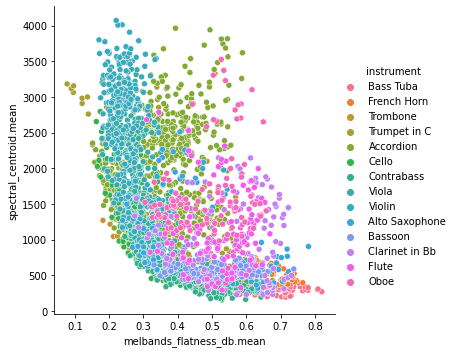

In [6]:
# Take two random features and plot the sample points
import seaborn as sns
sns.relplot(x = "melbands_flatness_db.mean", y = "spectral_centroid.mean", hue = "instrument", data = data);

### Preprocessing of the features


In [24]:
'''
Try to only use features from the 20th to the 60th
'''
data_modif = data.copy()

#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
# Scale everything between 0 and 1 (data normalization)
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,20:60] = min_max_scaler.fit_transform(data.iloc[:,20:60].values)

In [25]:
# Checking if our data is balanced (if not, we should balance it to prevent our model to be baised)
# Balance data, in a classification task, tends to have the same amount of training examples for each label
# https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
data_modif.instrument.value_counts()

Accordion         689
Contrabass        309
Viola             309
Cello             291
Violin            284
French Horn       134
Bassoon           126
Clarinet in Bb    126
Flute             118
Trombone          117
Bass Tuba         108
Oboe              107
Alto Saxophone     99
Trumpet in C       96
Name: instrument, dtype: int64

In [26]:
'''
It seems like sampling around 130 examples from each instruments
class is a good balance (you can see that from the summary above..)
'''
# We use pandas.DataFrame.sample()

min_number = data_modif.instrument.value_counts()['Bassoon']
print(f'All data will be randomly re-sampled with {min_number} values. The classes that had fewer examples than {min_number} will be upsampled.')

accordion_data = data_modif[data_modif.instrument == 'Accordion'].sample(n = min_number, random_state = 42)
contrabass_data = data_modif[data_modif.instrument == 'Contrabass'].sample(n = min_number)
viola_data = data_modif[data_modif.instrument == 'Viola'].sample(n = min_number)
cello_data = data_modif[data_modif.instrument == 'Cello'].sample(n = min_number)
violin_data = data_modif[data_modif.instrument == 'Violin'].sample(n = min_number)
frenchHorn_data = data_modif[data_modif.instrument == 'French Horn'].sample(n = min_number)
bassoon_data = data_modif[data_modif.instrument == 'Bassoon'].sample(n = min_number)
clarinetInBb_data = data_modif[data_modif.instrument == 'Clarinet in Bb'].sample(n = min_number)
flute_data = data_modif[data_modif.instrument == 'Flute'].sample(n = min_number, replace=True)
trombone_data = data_modif[data_modif.instrument == 'Trombone'].sample(n = min_number, replace=True)
bassTuba_data = data_modif[data_modif.instrument == 'Bass Tuba'].sample(n = min_number, replace=True)
oboe_data = data_modif[data_modif.instrument == 'Oboe'].sample(n = min_number, replace=True)
altoSaxophone_data = data_modif[data_modif.instrument == 'Alto Saxophone'].sample(n = min_number, replace=True)
trumpetInC_data = data_modif[data_modif.instrument == 'Trumpet in C'].sample(n = min_number, replace=True)


#Merging after downsampling
data_modif = pd.concat([accordion_data, contrabass_data, viola_data, cello_data, violin_data, frenchHorn_data, bassoon_data, clarinetInBb_data, flute_data, trombone_data, bassTuba_data, oboe_data, altoSaxophone_data, trumpetInC_data])
#Checking the balance again
print(data_modif.instrument.value_counts())

All data will be randomly re-sampled with 126 values. The classes that had fewer examples than 126 will be upsampled.
Accordion         126
Contrabass        126
Viola             126
Cello             126
Violin            126
French Horn       126
Bassoon           126
Clarinet in Bb    126
Flute             126
Trombone          126
Bass Tuba         126
Oboe              126
Alto Saxophone    126
Trumpet in C      126
Name: instrument, dtype: int64


## Supervised learning approach (Support Vector Machines)

In [27]:
# Input values put in a matrix, there are 84 features
X = data_modif.iloc[:,20:60].values 
# Creating output values
data_modif.instrument = pd.Categorical(data_modif.instrument)  # convert to categorical data
y = np.array(data_modif.instrument.cat.codes)  # create label encoded outputs
# Print the first sample
print("Features of the first sample: ", X[0])
print("Class of the first sample: ", y[0])

Features of the first sample:  [0.13607622 0.02130884 0.5836113  0.39318343 0.39463025 0.23274493
 0.43171346 0.18595804 0.41681669 0.52054635 0.43980545 0.08776004
 0.33903456 0.54387533 0.12228814 0.12782494 0.03668316 0.17381398
 0.544757   0.2548806  0.55007525 0.28804165 0.6096249  0.49473577
 1.         0.         1.         0.         0.2619222  0.71237015
 0.47292063 0.20812919 0.54471889 0.44566204 0.94034113 0.04577924
 0.06456243 0.04714452 0.16027388 0.11084348]
Class of the first sample:  0


In [28]:
# Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (1181, 40) , Size of train output vector:  (1181,)
Size of test features matrix:  (583, 40) , Size of test output vector:  (583,)


In [29]:
# Define and train the model

from sklearn import svm
clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))

# Fit model with training data
clf.fit(X_train, y_train)

# Predict classes of test samples
y_pred = clf.predict(X_test)

In [30]:
# Test the model
# Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,

In [31]:
# Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.8061749571183533


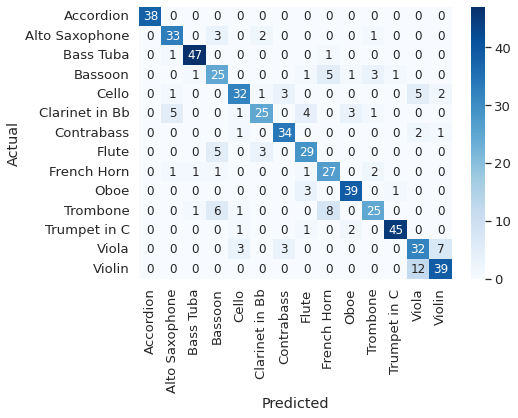

In [32]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.instrument)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

## Supervised learning approach (Neural Network)

In [33]:
from sklearn.preprocessing import StandardScaler

# Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# ..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

In [34]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (1411, 14)
One-hot encoded y_test shape =  (353, 14)


In [35]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))

    # Output layer
    # 14 instruments classes as output
    model.add(layers.Dense(name='Output_layer', units = 14))
    model.add(layers.Activation('sigmoid'))
    
    return model

model = compose_model(40)

In [36]:
model.summary()  # Plot summary of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (BatchNormalizat  (None, 40)               160       
 ion)                                                            
                                                                 
 Output_layer (Dense)        (None, 14)                574       
                                                                 
 activation_1 (Activation)   (None, 14)                0         
                                                                 
Total params: 734
Trainable params: 654
Non-trainable params: 80
_________________________________________________________________


In [37]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 250, validation_split=0.2, verbose=0)

In [38]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07881348580121994
Test accuracy: 0.8640226721763611


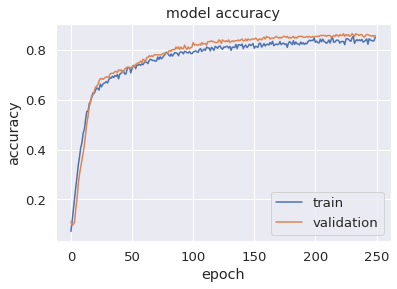

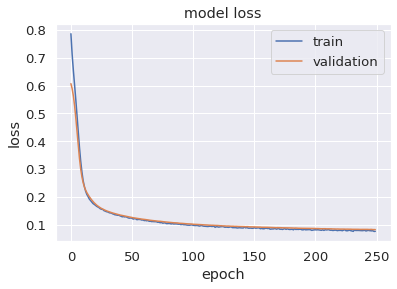

In [39]:
# summarize history for accuracy
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()